## Linear Regressions

### R and Python Imports

In [13]:
%reload_ext rpy2.ipython
%reload_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

In [14]:
%%R

require('tidyverse')

In [15]:
import pandas as pd
import numpy as np

# Show a large number of rows and columns when displaying dfs
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)
from IPython.display import display, HTML

### Load the data 

In [16]:
%%R
 
# Import data with R
df <- read_csv('merged.csv', show_col_types = FALSE)
df

# A tibble: 102 × 44
   `GHGRP ID` `Landfill ID` `Landfill Name`       State `Physical Address` City 
        <dbl>         <dbl> <chr>                 <chr> <chr>              <chr>
 1    1007291           734 Alpha Ridge SLF       MD    2350 Marriottsvil… Marr…
 2    1007291           734 Alpha Ridge SLF       MD    2350 Marriottsvil… Marr…
 3    1007291           734 Alpha Ridge SLF       MD    2350 Marriottsvil… Marr…
 4         NA           736 Appeal SLF            MD    <NA>               Lusby
 5         NA           736 Appeal SLF            MD    <NA>               Lusby
 6         NA           736 Appeal SLF            MD    <NA>               Lusby
 7         NA           740 Bowley's Lane LF      MD    Bowley's Lane      Balt…
 8         NA           740 Bowley's Lane LF      MD    Bowley's Lane      Balt…
 9         NA           740 Bowley's Lane LF      MD    Bowley's Lane      Balt…
10    1002655           741 Brown Station Road S… MD    3500 Brown Statio… Uppe…
# ℹ 92 

In [17]:
# Import data in python
df = pd.read_csv('merged.csv')
df.head()

,GHGRP ID,Landfill ID,Landfill Name,State,Physical Address,City,County,Zip Code,lat,long,Ownership Type,Landfill Owner Organization(s),Year Landfill Opened,Landfill Closure Year,Current Landfill Status,Waste in Place (tons),Waste in Place Year,LFG Collection System In Place?,LFG Collected (mmscfd),LFG Flared (mmscfd),Project ID,Current Project Status,Project Name,Project Start Date,Project Shutdown Date,Project Type Category,LFG Energy Project Type,RNG Delivery Method,Actual MW Generation,Rated MW Capacity,LFG Flow to Project (mmscfd),Current Year Emission Reductions (MMTCO2e/yr) - Direct,Current Year Emission Reductions (MMTCO2e/yr) - Avoided,GEOID_x,STATE,COUNTY,TRACT,BLOCK,GEOID_y,NAME,variable,estimate,moe,geometry
0,1007291.0,734,Alpha Ridge SLF,MD,2350 Marriottsville Road,Marriottsville,Howard,21104.0,39.305776,-76.898803,Public,"Howard County, MD",1980.0,2053.0,Open,"3,039,953",2021.0,Yes,0.309,0.029,804-0,Operational,Project #1,9/21/12,NaN,Electricity,Reciprocating Engine,NaN,0.58,1.059,0.28,0.0294,0.0028,240276030013008,24,27,603001,3008,24027603001,"Census Tract 6030.01, Howard County, Maryland",B01002_001,46.7,1.6,"list(list(c(-76.930591, -76.930146, -76.928361..."
1,1007291.0,734,Alpha Ridge SLF,MD,2350 Marriottsville Road,Marriottsville,Howard,21104.0,39.305776,-76.898803,Public,"Howard County, MD",1980.0,2053.0,Open,"3,039,953",2021.0,Yes,0.309,0.029,804-0,Operational,Project #1,9/21/12,NaN,Electricity,Reciprocating Engine,NaN,0.58,1.059,0.28,0.0294,0.0028,240276030013008,24,27,603001,3008,24027603001,"Census Tract 6030.01, Howard County, Maryland",B01003_001,6212.0,502.0,"list(list(c(-76.930591, -76.930146, -76.928361..."
2,1007291.0,734,Alpha Ridge SLF,MD,2350 Marriottsville Road,Marriottsville,Howard,21104.0,39.305776,-76.898803,Public,"Howard County, MD",1980.0,2053.0,Open,"3,039,953",2021.0,Yes,0.309,0.029,804-0,Operational,Project #1,9/21/12,NaN,Electricity,Reciprocating Engine,NaN,0.58,1.059,0.28,0.0294,0.0028,240276030013008,24,27,603001,3008,24027603001,"Census Tract 6030.01, Howard County, Maryland",B19013_001,125298.0,11749.0,"list(list(c(-76.930591, -76.930146, -76.928361..."
3,NaN,736,Appeal SLF,MD,NaN,Lusby,Calvert,20657.0,38.381112,-76.438334,Public,"Calvert County, MD",1993.0,2014.0,Closed,"364,268",2009.0,Yes,NaN,NaN,806-0,Low Potential,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,240098610033000,24,9,861003,3000,24009861003,"Census Tract 8610.03, Calvert County, Maryland",B01002_001,38.9,6.5,"list(list(c(-76.452533, -76.448208, -76.444544..."
4,NaN,736,Appeal SLF,MD,NaN,Lusby,Calvert,20657.0,38.381112,-76.438334,Public,"Calvert County, MD",1993.0,2014.0,Closed,"364,268",2009.0,Yes,NaN,NaN,806-0,Low Potential,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,240098610033000,24,9,861003,3000,24009861003,"Census Tract 8610.03, Calvert County, Maryland",B01003_001,6548.0,914.0,"list(list(c(-76.452533, -76.448208, -76.444544..."


In [18]:
# Clean up data to only get rows with variable = B19013_001 to only show median income

df = df[df['variable'] == 'B19013_001']
df.head()

,GHGRP ID,Landfill ID,Landfill Name,State,Physical Address,City,County,Zip Code,lat,long,Ownership Type,Landfill Owner Organization(s),Year Landfill Opened,Landfill Closure Year,Current Landfill Status,Waste in Place (tons),Waste in Place Year,LFG Collection System In Place?,LFG Collected (mmscfd),LFG Flared (mmscfd),Project ID,Current Project Status,Project Name,Project Start Date,Project Shutdown Date,Project Type Category,LFG Energy Project Type,RNG Delivery Method,Actual MW Generation,Rated MW Capacity,LFG Flow to Project (mmscfd),Current Year Emission Reductions (MMTCO2e/yr) - Direct,Current Year Emission Reductions (MMTCO2e/yr) - Avoided,GEOID_x,STATE,COUNTY,TRACT,BLOCK,GEOID_y,NAME,variable,estimate,moe,geometry
2,1007291.0,734,Alpha Ridge SLF,MD,2350 Marriottsville Road,Marriottsville,Howard,21104.0,39.305776,-76.898803,Public,"Howard County, MD",1980.0,2053.0,Open,"3,039,953",2021.0,Yes,0.309,0.029,804-0,Operational,Project #1,9/21/12,NaN,Electricity,Reciprocating Engine,NaN,0.58,1.059,0.28,0.0294,0.0028,240276030013008,24,27,603001,3008,24027603001,"Census Tract 6030.01, Howard County, Maryland",B19013_001,125298.0,11749.0,"list(list(c(-76.930591, -76.930146, -76.928361..."
5,NaN,736,Appeal SLF,MD,NaN,Lusby,Calvert,20657.0,38.381112,-76.438334,Public,"Calvert County, MD",1993.0,2014.0,Closed,"364,268",2009.0,Yes,NaN,NaN,806-0,Low Potential,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,240098610033000,24,9,861003,3000,24009861003,"Census Tract 8610.03, Calvert County, Maryland",B19013_001,117083.0,27657.0,"list(list(c(-76.452533, -76.448208, -76.444544..."
8,NaN,740,Bowley's Lane LF,MD,Bowley's Lane,Baltimore,Baltimore city,21206.0,39.313800,-76.544400,Unknown,NaN,1955.0,1985.0,Closed,"490,000",NaN,Yes,NaN,NaN,810-0,Low Potential,NaN,NaN,NaN,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,245102604022006,24,510,260402,2006,24510260402,"Census Tract 2604.02, Baltimore city, Maryland",B19013_001,46210.0,8357.0,"list(list(c(-76.549349, -76.548938, -76.548136..."
11,1002655.0,741,Brown Station Road Sanitary Landfill,MD,3500 Brown Station Road,Upper Marlboro,Prince George's,20774.0,38.851000,-76.789000,Public,"Prince George's County, MD",1968.0,2028.0,Open,"19,027,722",2021.0,Yes,2.740,0.990,166975-0,Shutdown,Project #2,4/20/87,8/15/18,Electricity,Reciprocating Engine,NaN,2.55,2.550,1.33,0.0000,0.0000,240338006071007,24,33,800607,1007,24033800607,"Census Tract 8006.07, Prince George's County, ...",B19013_001,150030.0,11638.0,"list(list(c(-76.812057, -76.80645, -76.804028,..."
14,1002655.0,741,Brown Station Road Sanitary Landfill,MD,3500 Brown Station Road,Upper Marlboro,Prince George's,20774.0,38.851000,-76.789000,Public,"Prince George's County, MD",1968.0,2028.0,Open,"19,027,722",2021.0,Yes,2.740,0.990,166975-1,Operational,"Project #2, Expansion #1",12/1/03,NaN,Electricity,Reciprocating Engine,NaN,3.50,4.200,1.75,0.1771,0.0170,240338006071007,24,33,800607,1007,24033800607,"Census Tract 8006.07, Prince George's County, ...",B19013_001,150030.0,11638.0,"list(list(c(-76.812057, -76.80645, -76.804028,..."


### Median income and Waste in Place

In [19]:
# create a new dataframe showing estimate and waste in place

df_income = df[['Landfill ID', 'Landfill Name', 'Waste in Place (tons)', 'estimate']]

df_income['Waste in Place (tons)'] = df_income['Waste in Place (tons)'].str.replace(',', '').astype(float)

df_income

# get unique values of estimate
df_income = df_income.drop_duplicates()
df_income 

,Landfill ID,Landfill Name,Waste in Place (tons),estimate
2,734,Alpha Ridge SLF,3039953.0,125298.0
5,736,Appeal SLF,364268.0,117083.0
8,740,Bowley's Lane LF,490000.0,46210.0
11,741,Brown Station Road Sanitary Landfill,19027722.0,150030.0
20,742,Cecil County Central Landfill,3606445.0,56000.0
23,744,Charles County Landfill #2,2063102.0,116419.0
26,745,Eastern Sanitary Landfill Solid Waste Manageme...,7971798.0,139500.0
32,2270,Honey-Go-Run Reclamation,2528416.0,139500.0
35,746,Fort Detrick SLF,79172.0,132988.0
38,747,Fort Meade SLF,1074376.0,126681.0


`geom_smooth()` using formula = 'y ~ x'


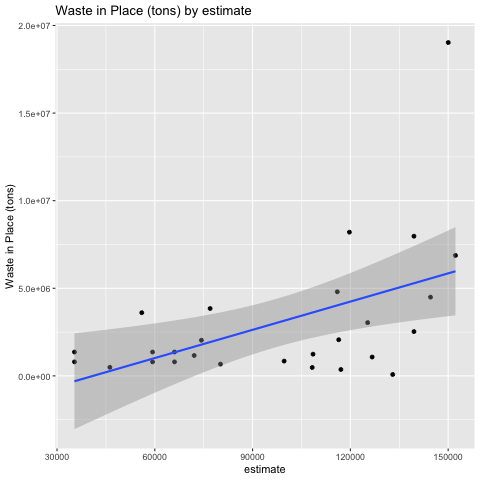

In [20]:
%%R -i df_income

library(ggrepel)

# make a scatterplot of estimate and Waste in Place (tons)
ggplot(df_income, aes(x = estimate, y = `Waste in Place (tons)`)) +
  geom_point() +
  geom_smooth(method = 'lm') +
  labs(title = 'Waste in Place (tons) by estimate')

In [21]:
# show income higher than 140000

df_income = df_income[df_income['estimate'] > 140000]
df_income

,Landfill ID,Landfill Name,Waste in Place (tons),estimate
11,741,Brown Station Road Sanitary Landfill,19027722.0,150030.0
80,759,Oaks SLF,6874060.0,152240.0
86,764,Reich's Ford Road SLF,4493586.0,144583.0


In [22]:
%%R

model <- lm(`Waste in Place (tons)` ~ estimate, data = df_income)
summary(model)

# the higher the income the higher waste in place
# lower p-value shows that the relationship is significant



Call:
lm(formula = `Waste in Place (tons)` ~ estimate, data = df_income)

Residuals:
     Min       1Q   Median       3Q      Max 
-4858478 -2145149  -179845  1004790 13174591 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -2.206e+06  1.923e+06  -1.147  0.26216   
estimate     5.372e+01  1.856e+01   2.895  0.00776 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3476000 on 25 degrees of freedom
Multiple R-squared:  0.2511,	Adjusted R-squared:  0.2211 
F-statistic:  8.38 on 1 and 25 DF,  p-value: 0.007761



### Ownership Type and Median Income

In [23]:
# create a new dataframe showing estimate and waste in place

df_ownership_income = df[['Landfill ID', 'Landfill Name', 'Ownership Type', 'estimate']]

# remove duplicating rows
df_ownership_income = df_ownership_income.drop_duplicates()

df_ownership_income

,Landfill ID,Landfill Name,Ownership Type,estimate
2,734,Alpha Ridge SLF,Public,125298.0
5,736,Appeal SLF,Public,117083.0
8,740,Bowley's Lane LF,Unknown,46210.0
11,741,Brown Station Road Sanitary Landfill,Public,150030.0
20,742,Cecil County Central Landfill,Public,56000.0
23,744,Charles County Landfill #2,Public,116419.0
26,745,Eastern Sanitary Landfill Solid Waste Manageme...,Public,139500.0
32,2270,Honey-Go-Run Reclamation,Private,139500.0
35,746,Fort Detrick SLF,Public,132988.0
38,747,Fort Meade SLF,Public,126681.0


`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In qt((1 - level)/2, df) :
R[write to console]:  NaNs produced

R[write to console]: 2: 
R[write to console]: In max(ids, na.rm = TRUE) :
R[write to console]: 
 
R[write to console]:  no non-missing arguments to max; returning -Inf



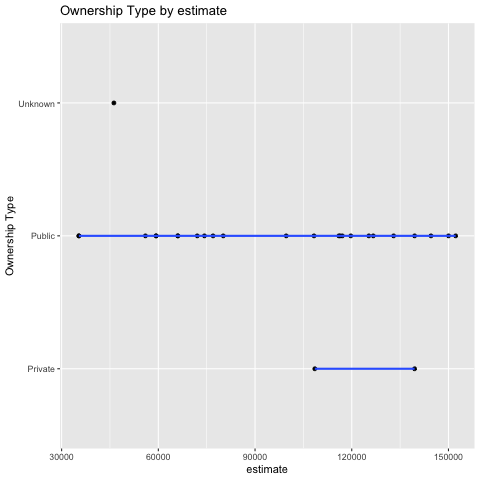

In [24]:
%%R -i df_ownership_income

library(ggrepel)

# make a scatterplot of estimate and Ownership Type
ggplot(df_ownership_income, aes(x = estimate, y = `Ownership Type`)) +
  geom_point() +
  geom_smooth(method = 'lm') +
  labs(title = 'Ownership Type by estimate')